In [216]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [2]:
df = pd.read_csv("../Resources/clean_data_with_datetime_10_18.csv")

In [3]:
df.head()

,Unnamed: 0,Datetime,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime String
0,0,2018-12-31 00:00:00,HARASSMENT,2703,N,2018-12-31,0,RESIDENCE / HOME,4600 MUELLER BLVD,78723.0,9.0,BA,3.06,N,1/9/19,NaN,30.299481,-97.708049,2018-12-31 0000
1,1,2018-12-31 17:30:00,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758.0,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329,2018-12-31 1730
2,2,2018-12-31 07:55:00,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701.0,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674,2018-12-31 0755
3,3,2018-12-31 11:04:00,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759.0,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414,2018-12-31 1104
4,4,2018-12-31 19:30:00,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717.0,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352,2018-12-31 1930


In [4]:
df.dtypes

Unnamed: 0                       int64
Datetime                        object
Highest Offense Description     object
Highest Offense Code             int64
Family Violence                 object
Occurred Date                   object
Occurred Time                    int64
Location Type                   object
Address                         object
Zip Code                       float64
Council District               float64
APD Sector                      object
Census Tract                   float64
Clearance Status                object
Clearance Date                  object
Category Description            object
Latitude                       float64
Longitude                      float64
Datetime String                 object
dtype: object

In [ ]:
# Code was used to normalize the string format hour occurred so it could be used in 
# the to_datetime function to create a datetime index
# Very slow! Over a day to run on 500k+ rows
for index, row in df.iterrows():
    if type( row["Datetime String"] ) == float:
        print( index )
        hour_string = " "
        length = len( str( row["Occurred Time"] ) )
        if length == 1:
            hour_string += "000"
        elif length == 2:
            hour_string += "00"
        elif length == 3:
            hour_string += "0"
        df.iloc[index, 17] = str(row["Occurred Date"] )
        df.iloc[index, 17] += hour_string
        df.iloc[index, 17] += str(row["Occurred Time"])        

In [ ]:
# There were still a couple of rows where the hour string had an value that wouldn't parse after normalization
# Given how slow iterrows took to run the logic in the loop above, I used a try/catch block and just printed the
# rows that I needed to look more closely at
for index, row in df.iterrows():
    try:
        pd.to_datetime( row["Datetime String"])
    except:
        print( index )

In [ ]:
# After fixing rows pointed to by index above was then able to use vectorized to_datetime.  Very fast.
df["Datetime"] = pd.to_datetime( row["Datetime String"] )

In [ ]:
df[df.index.year == 2010]['Highest Offense Description'].value_counts().head(20)

In [24]:
# Set the index as the new datetime field
df.set_index("Datetime")

,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude
Datetime,,,,,,,,,,,,,,,,
2018-12-31 00:00:00,HARASSMENT,2703,N,2018-12-31,0,RESIDENCE / HOME,4600 MUELLER BLVD,78723.0,9.0,BA,3.06,N,1/9/19,NaN,30.299481,-97.708049
2018-12-31 17:30:00,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758.0,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329
2018-12-31 07:55:00,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701.0,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674
2018-12-31 11:04:00,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759.0,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414
2018-12-31 19:30:00,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717.0,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-01-01 00:00:00,IDENTITY THEFT,4022,N,2010-01-01,0,RESIDENCE / HOME,6705 E US 290 HWY EB,78723.0,1.0,ID,21.12,N,5/9/11,NaN,30.321102,-97.690899
2010-01-01 20:26:00,POSS MARIJUANA,1803,N,2010-01-01,2026,STREETS / HWY / ROAD / ALLEY,1135 AIRPORT BLVD,78721.0,1.0,CH,21.11,C,1/4/10,NaN,30.269543,-97.696360
2010-01-01 17:44:00,FAMILY DISTURBANCE,3400,N,2010-01-01,1744,PARKING LOTS / GARAGE,1137 GUNTER ST,78721.0,1.0,CH,21.11,N,1/4/10,NaN,30.269224,-97.695136


In [32]:
# was then able to use .hour method on .index which allowed for carving up data by time
for hour in range( 0, 24 ):
    print( f"Hour {hour}, percent offenses {len(df[df.index.hour == hour])/len(df)*100}")

Hour 0, percent offenses 6.21018240159504
Hour 1, percent offenses 4.6020966058661354
Hour 2, percent offenses 4.586714746335613
Hour 3, percent offenses 2.7730182713126372
Hour 4, percent offenses 1.7161482266078911
Hour 5, percent offenses 1.2500194707082664
Hour 6, percent offenses 1.369180205299148
Hour 7, percent offenses 2.148008535958504
Hour 8, percent offenses 2.8600523372638205
Hour 9, percent offenses 2.9710353743827786
Hour 10, percent offenses 3.5806632502063893
Hour 11, percent offenses 3.5717067244038065
Hour 12, percent offenses 6.4841352669044685
Hour 13, percent offenses 3.8108070219162293
Hour 14, percent offenses 4.008240003738376
Hour 15, percent offenses 4.332232589292668
Hour 16, percent offenses 4.61436315207402
Hour 17, percent offenses 5.215813330425707
Hour 18, percent offenses 5.60620103116871
Hour 19, percent offenses 5.259622424025296
Hour 20, percent offenses 5.429601707191701
Hour 21, percent offenses 5.637938285643078
Hour 22, percent offenses 6.2919593

In [33]:
# A for loop to look at crimes by hour block
for hour in [0,3,6,9,12,15,18,21]:
    print(f"Hours {hour}-{hour+3}: { len( df[(df.index.hour >= hour)& (df.index.hour < (hour+3))] ) }")

Hours 0-3: 79088
Hours 3-6: 29476
Hours 6-9: 32753
Hours 9-12: 51993
Hours 12-15: 73460
Hours 15-18: 72737
Hours 18-21: 83692
Hours 21-24: 90393


In [230]:
hour_blocks = [0,3,6,9,12,15,18,21]

In [232]:
# list comprehension which calculates length of subsetted data frame for each hour block
pct_crime_by_hour_block = [ np.round((len( df[(df.index.hour >= hour)& (df.index.hour < (hour+3))] )/len(df)*100),1) for hour in hour_blocks ]

In [233]:
pct_crime_by_hour_block

[15.4, 5.7, 6.4, 10.1, 14.3, 14.2, 16.3, 17.6]

In [234]:
hour_block_strings = ["0-3","3-6","6-9","9-12","12-15","15-18","18-21","21-24"]

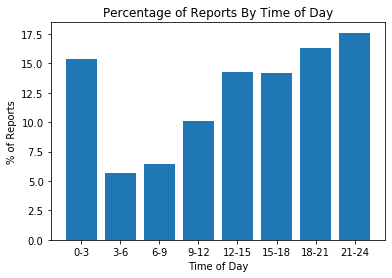

In [253]:
# Graph total crime reports for each hour block
plt.bar( hour_block_strings, pct_crime_by_hour_block )
plt.xlabel("Time of Day")
plt.ylabel("% of Reports")
plt.title("Percentage of Reports By Time of Day")
plt.savefig("crimeReportsByTimeOfDay.png")

In [301]:
# for loop creates a dictionary of percent of total crime for hour block by day
days_of_week = range( 0, 7)
crime_by_day_and_hour = {}
for day in days_of_week:
    pct_crime_by_hour_block = [ np.round((len( df[(df.index.hour >= hour)& (df.index.hour < (hour+3)) & 
                                                  (df.index.dayofweek==day)] ) 
                                          /len(df)*100),10) for hour in hour_blocks ]
    crime_by_day_and_hour[day] = pct_crime_by_hour_block


In [300]:
crime_by_day_and_hour

{0: [1.813696475,
  0.6707658998,
  0.9861913737,
  1.533318276,
  2.1071200486,
  2.1291219489,
  2.3571239427,
  2.2909235346],
 1: [1.5597984392,
  0.5858736117,
  1.005662082,
  1.5761538342,
  2.1532656272,
  2.1326266764,
  2.3637439836,
  2.3616022056],
 2: [1.7270518232,
  0.5915201171,
  1.0140344865,
  1.5307870839,
  2.1688421938,
  2.0652580258,
  2.3216872537,
  2.3573186498],
 3: [1.8284942133,
  0.654799919,
  0.9708095142,
  1.5060592844,
  2.0531861867,
  2.0230065889,
  2.3674434181,
  2.5849312295],
 4: [2.3633545694,
  0.8058926151,
  0.982297232,
  1.5831632891,
  2.294233555,
  2.1429461518,
  2.4554510195,
  2.8174114862],
 5: [3.0975949781,
  1.1931650026,
  0.7379398433,
  1.2996697768,
  1.8689932865,
  1.9028723189,
  2.2733998972,
  2.7961884141],
 6: [3.0090032555,
  1.2371688033,
  0.6803065468,
  1.0942538046,
  1.6575413947,
  1.766577361,
  2.1565756476,
  2.3917818035],
 7: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

In [303]:
crime_by_day_hour_df = pd.DataFrame(crime_by_day_and_hour)

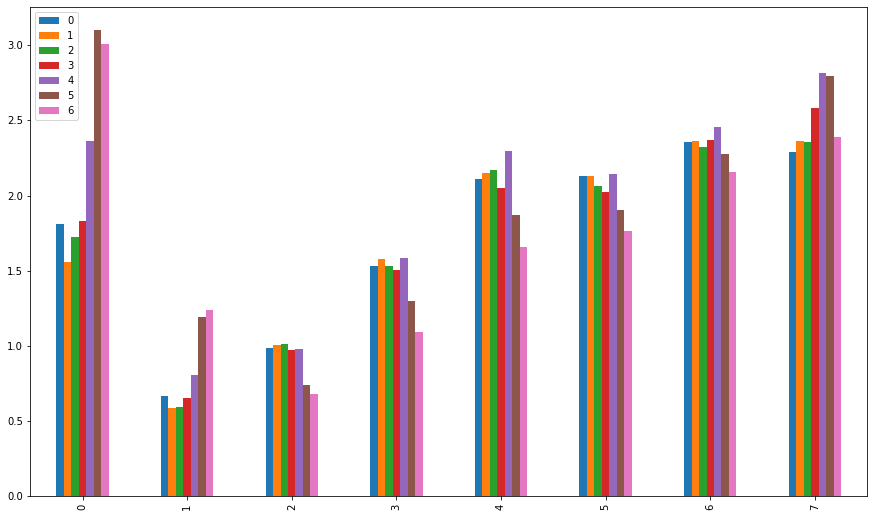

In [304]:
# didnt unltimately use this visualization, it's grouped first by 3 hour block and then by day,  I wanted
# a graph with crime reports shown for each 3 hour block for as each day went by
crime_by_day_hour_plot = crime_by_day_hour_df.plot.bar(figsize=(15,9))

In [34]:
# for loop calculates percent of crime in each hour block
for hour in [0,3,6,9,12,15,18,21]:
    print(f"Hours {hour}-{hour+3}: { len( df[(df.index.hour >= hour)& (df.index.hour < (hour+3))] )/len(df)*100 }")

Hours 0-3: 15.39899375379679
Hours 3-6: 5.739185968628795
Hours 6-9: 6.377241078521473
Hours 9-12: 10.123405348992975
Hours 12-15: 14.303182292559075
Hours 15-18: 14.162409071792394
Hours 18-21: 16.29542516238571
Hours 21-24: 17.600157323322794


In [35]:
# For loop prints top 10 offense description for each 3 hour block
for hour in [0,3,6,9,12,15,18,21]:
    print(f'\nHours {hour}-{hour+3}:')
    print(f'{ df[(df.index.hour >= hour)& (df.index.hour < (hour+3))]["Highest Offense Description"].value_counts().head(10) }')
          


Hours 0-3:
DWI                               8718
FAMILY DISTURBANCE                6224
BURGLARY OF VEHICLE               5583
PUBLIC INTOXICATION               5510
THEFT                             5025
CRIMINAL MISCHIEF                 4190
ASSAULT WITH INJURY               3219
ASSAULT W/INJURY-FAM/DATE VIOL    3068
POSS MARIJUANA                    2137
DISTURBANCE - OTHER               1948
Name: Highest Offense Description, dtype: int64

Hours 3-6:
FAMILY DISTURBANCE                3086
DWI                               2525
BURGLARY OF VEHICLE               2182
CRIMINAL MISCHIEF                 1796
PUBLIC INTOXICATION               1759
ASSAULT W/INJURY-FAM/DATE VIOL    1638
THEFT                             1464
ASSAULT WITH INJURY               1073
BURGLARY NON RESIDENCE             903
DISTURBANCE - OTHER                871
Name: Highest Offense Description, dtype: int64

Hours 6-9:
THEFT                             2386
BURGLARY OF RESIDENCE             2306
BURGLARY O

In [36]:
type( df[df.index.year == 2018]['Highest Offense Description'].value_counts().head(20) )

pandas.core.series.Series

In [37]:
df[df.index.year == 2018]['Highest Offense Description'].value_counts().head(20).index

Index(['FAMILY DISTURBANCE', 'BURGLARY OF VEHICLE', 'THEFT',
       'CRIMINAL MISCHIEF', 'ASSAULT W/INJURY-FAM/DATE VIOL',
       'DISTURBANCE - OTHER', 'DWI', 'HARASSMENT', 'ASSAULT WITH INJURY',
       'THEFT BY SHOPLIFTING', 'POSS MARIJUANA',
       'POSS CONTROLLED SUB/NARCOTIC', 'AUTO THEFT', 'RUNAWAY CHILD',
       'CRIMINAL TRESPASS', 'BURGLARY OF RESIDENCE', 'PUBLIC INTOXICATION',
       'ASSAULT BY CONTACT', 'BURGLARY NON RESIDENCE',
       'POSS OF DRUG PARAPHERNALIA'],
      dtype='object')

In [39]:
x_values = df[df.index.year == 2018]['Highest Offense Description'].value_counts().head(20).index
y_values = df[df.index.year == 2018]['Highest Offense Description'].value_counts().head(20).tolist()

Text(0.5, 1.0, 'Crime breakdown 2018')

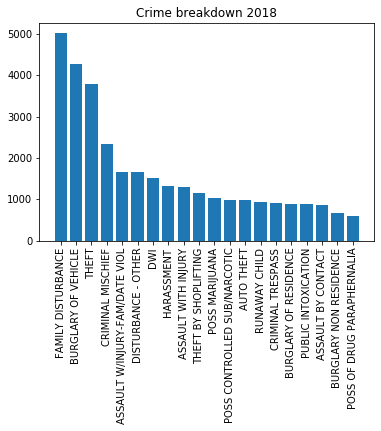

In [40]:
# Graph top 20 crimes for 2018
plt.bar(x_values, y_values )
plt.xticks(rotation = 90)
plt.title("Crime breakdown 2018")

In [41]:
# function to  print bar graph
def crime_offense_types_bar(x_values, y_values, title):
    plt.bar(x_values, y_values )
    plt.xticks(rotation = 90)
    plt.title(title)
    plt.show()

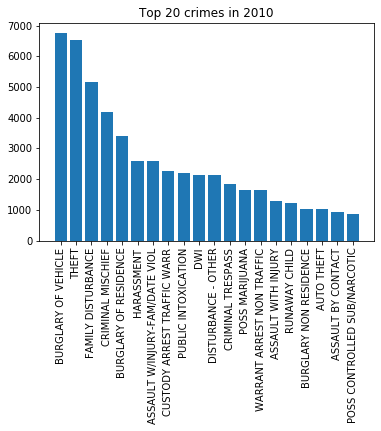

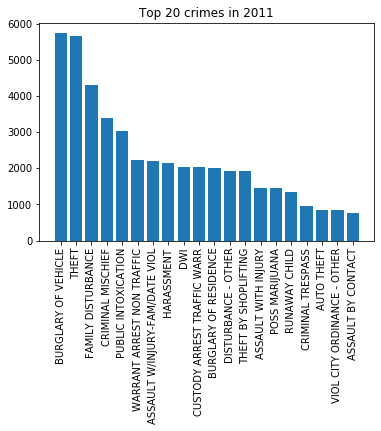

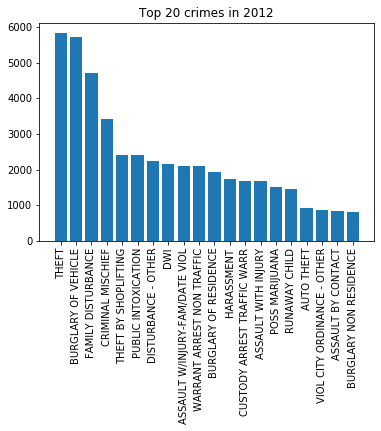

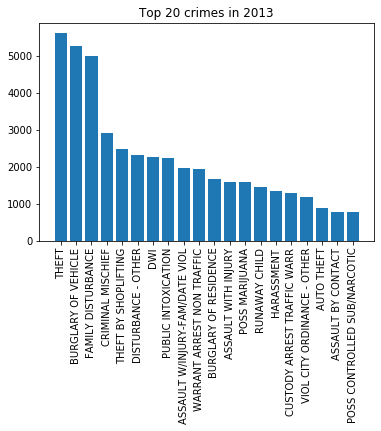

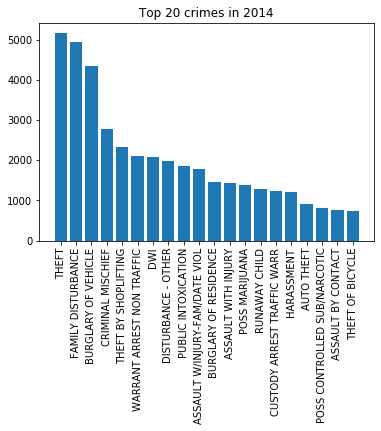

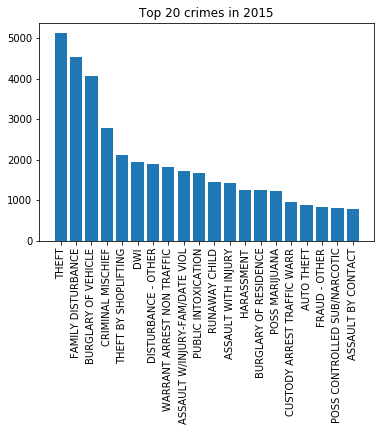

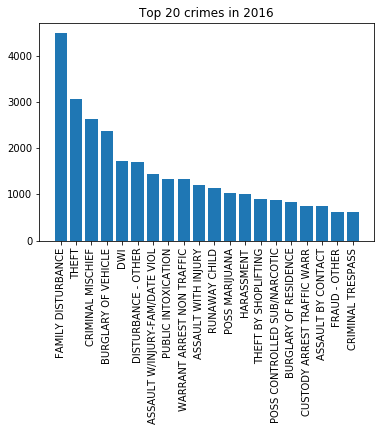

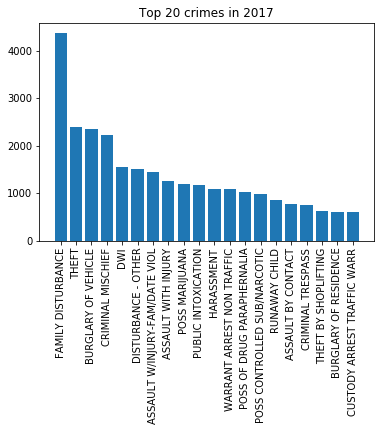

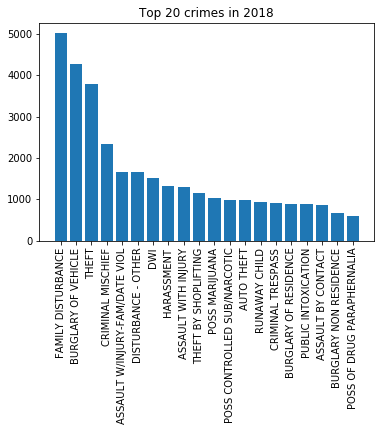

In [42]:
# Loops through years and prints top crimes for each year
for year in range(2010,2019):
    x_values = df[df.index.year == year]['Highest Offense Description'].value_counts().head(20).index
    y_values = df[df.index.year == year]['Highest Offense Description'].value_counts().head(20).tolist()
    title = f"Top 20 crimes in {year}"
    crime_offense_types_bar( x_values, y_values, title )

In [190]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [45]:
# Exploring list comprehensions to create lists of the data I want to graph
theft_by_year = [ len(df[(df.index.year==year) & (df["Highest Offense Description"]=="THEFT")] ) for year in years ]

In [48]:
fam_dist_by_year =  [ len(df[(df.index.year==year) & (df["Highest Offense Description"]=="FAMILY DISTURBANCE")]) for year in years ]

In [49]:
fam_dist_by_year

[5173, 4305, 4705, 5006, 4945, 4525, 4487, 4370, 5016]

In [47]:
theft_by_year

[6527, 5667, 5827, 5603, 5163, 5118, 3063, 2407, 3791]

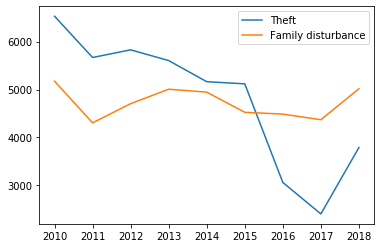

In [53]:
#graphs 2 highest offenses over the years studied
plt.plot(years, theft_by_year, label="theft")
plt.plot( years, fam_dist_by_year, label="family disturbance")
plt.legend( ["Theft", "Family disturbance"])

In [50]:
top_offenses_2018 = df[df.index.year == 2018]['Highest Offense Description'].value_counts().head(20).index.tolist()

In [51]:
top_offenses_2018

['FAMILY DISTURBANCE',
 'BURGLARY OF VEHICLE',
 'THEFT',
 'CRIMINAL MISCHIEF',
 'ASSAULT W/INJURY-FAM/DATE VIOL',
 'DISTURBANCE - OTHER',
 'DWI',
 'HARASSMENT',
 'ASSAULT WITH INJURY',
 'THEFT BY SHOPLIFTING',
 'POSS MARIJUANA',
 'POSS CONTROLLED SUB/NARCOTIC',
 'AUTO THEFT',
 'RUNAWAY CHILD',
 'CRIMINAL TRESPASS',
 'BURGLARY OF RESIDENCE',
 'PUBLIC INTOXICATION',
 'ASSAULT BY CONTACT',
 'BURGLARY NON RESIDENCE',
 'POSS OF DRUG PARAPHERNALIA']

In [52]:
# Calculate top 20 offenses for years studied
top_offenses_10_18 = df['Highest Offense Description'].value_counts().head(20).index.tolist()

In [ ]:
df[df.index.year == 2018]['Highest Offense Description'].value_counts().head(20).index.tolist()

In [191]:
# Uses a list comprehension inside a for loop to create a dict keyed by offense with the values for that offense over the years
top_offenses_by_year = {}
for offense in top_offenses_10_18:
    top_offenses_by_year[offense] = [ len(df[(df.index.year==year) & (df["Highest Offense Description"]==offense)] ) for year in years ]

In [56]:
# the dict created
top_offenses_by_year

{'THEFT': [6527, 5667, 5827, 5603, 5163, 5118, 3063, 2407, 3791],
 'FAMILY DISTURBANCE': [5173, 4305, 4705, 5006, 4945, 4525, 4487, 4370, 5016],
 'BURGLARY OF VEHICLE': [6740, 5731, 5741, 5261, 4352, 4056, 2378, 2348, 4273],
 'CRIMINAL MISCHIEF': [4185, 3400, 3429, 2903, 2788, 2781, 2634, 2220, 2340],
 'DWI': [2128, 2048, 2163, 2258, 2080, 1944, 1716, 1554, 1504],
 'DISTURBANCE - OTHER': [2126, 1936, 2232, 2302, 1977, 1884, 1692, 1513, 1650],
 'ASSAULT W/INJURY-FAM/DATE VIOL': [2598,
  2198,
  2112,
  1955,
  1790,
  1709,
  1439,
  1452,
  1664],
 'PUBLIC INTOXICATION': [2211, 3025, 2395, 2235, 1853, 1670, 1344, 1168, 875],
 'WARRANT ARREST NON TRAFFIC': [1643,
  2236,
  2093,
  1933,
  2114,
  1816,
  1328,
  1087,
  565],
 'THEFT BY SHOPLIFTING': [698, 1920, 2420, 2483, 2324, 2110, 909, 634, 1161],
 'BURGLARY OF RESIDENCE': [3418, 2006, 1943, 1678, 1469, 1243, 845, 613, 884],
 'HARASSMENT': [2606, 2149, 1731, 1348, 1214, 1252, 1002, 1095, 1322],
 'ASSAULT WITH INJURY': [1276, 1461, 

In [61]:
# Calculate top 10 offenses for years studied.  top 20 is too much for graphing
top_10_offenses_10_18 = df['Highest Offense Description'].value_counts().head(10).index.tolist()

In [192]:
# same as above, list comprehension w/ for loop, creates offense keyed dict w/ numbers over years
top_10_offenses_by_year = {}
for offense in top_10_offenses_10_18:
    top_10_offenses_by_year[offense] = [ len(df[(df.index.year==year) & (df["Highest Offense Description"]==offense)] ) for year in years ]

In [193]:
# dict created, crimes w/ list of their numbers over the years
top_10_offenses_by_year

{'THEFT': [6527, 5667, 5827, 5603, 5163, 5118, 3063, 2407, 3791],
 'FAMILY DISTURBANCE': [5173, 4305, 4705, 5006, 4945, 4525, 4487, 4370, 5016],
 'BURGLARY OF VEHICLE': [6740, 5731, 5741, 5261, 4352, 4056, 2378, 2348, 4273],
 'CRIMINAL MISCHIEF': [4185, 3400, 3429, 2903, 2788, 2781, 2634, 2220, 2340],
 'DWI': [2128, 2048, 2163, 2258, 2080, 1944, 1716, 1554, 1504],
 'DISTURBANCE - OTHER': [2126, 1936, 2232, 2302, 1977, 1884, 1692, 1513, 1650],
 'ASSAULT W/INJURY-FAM/DATE VIOL': [2598,
  2198,
  2112,
  1955,
  1790,
  1709,
  1439,
  1452,
  1664],
 'PUBLIC INTOXICATION': [2211, 3025, 2395, 2235, 1853, 1670, 1344, 1168, 875],
 'WARRANT ARREST NON TRAFFIC': [1643,
  2236,
  2093,
  1933,
  2114,
  1816,
  1328,
  1087,
  565],
 'THEFT BY SHOPLIFTING': [698, 1920, 2420, 2483, 2324, 2110, 909, 634, 1161]}

In [131]:
top_10_offenses_by_year.keys()

dict_keys(['THEFT', 'FAMILY DISTURBANCE', 'BURGLARY OF VEHICLE', 'CRIMINAL MISCHIEF', 'DWI', 'DISTURBANCE - OTHER', 'ASSAULT W/INJURY-FAM/DATE VIOL', 'PUBLIC INTOXICATION', 'WARRANT ARREST NON TRAFFIC', 'THEFT BY SHOPLIFTING'])

In [173]:
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [195]:
# Create data frame from dict
top10_offenses_df = pd.DataFrame(top_10_offenses_by_year )

In [203]:
top10_offenses_df.head(15)

,THEFT,FAMILY DISTURBANCE,BURGLARY OF VEHICLE,CRIMINAL MISCHIEF,DWI,DISTURBANCE - OTHER,ASSAULT W/INJURY-FAM/DATE VIOL,PUBLIC INTOXICATION,WARRANT ARREST NON TRAFFIC,THEFT BY SHOPLIFTING
Year,,,,,,,,,,
2010,6527,5173,6740,4185,2128,2126,2598,2211,1643,698
2011,5667,4305,5731,3400,2048,1936,2198,3025,2236,1920
2012,5827,4705,5741,3429,2163,2232,2112,2395,2093,2420
2013,5603,5006,5261,2903,2258,2302,1955,2235,1933,2483
2014,5163,4945,4352,2788,2080,1977,1790,1853,2114,2324
2015,5118,4525,4056,2781,1944,1884,1709,1670,1816,2110
2016,3063,4487,2378,2634,1716,1692,1439,1344,1328,909
2017,2407,4370,2348,2220,1554,1513,1452,1168,1087,634
2018,3791,5016,4273,2340,1504,1650,1664,875,565,1161


In [200]:
# add years to df
top10_offenses_df["Year"] = years

In [202]:
top10_offenses_df = top10_offenses_df.set_index("Year")

In [229]:
top10_offenses_df.to_csv("../Resources/top10_offenses_by_year.csv")

Text(0.5, 1.0, 'Top 10 Crimes from 2010-18')

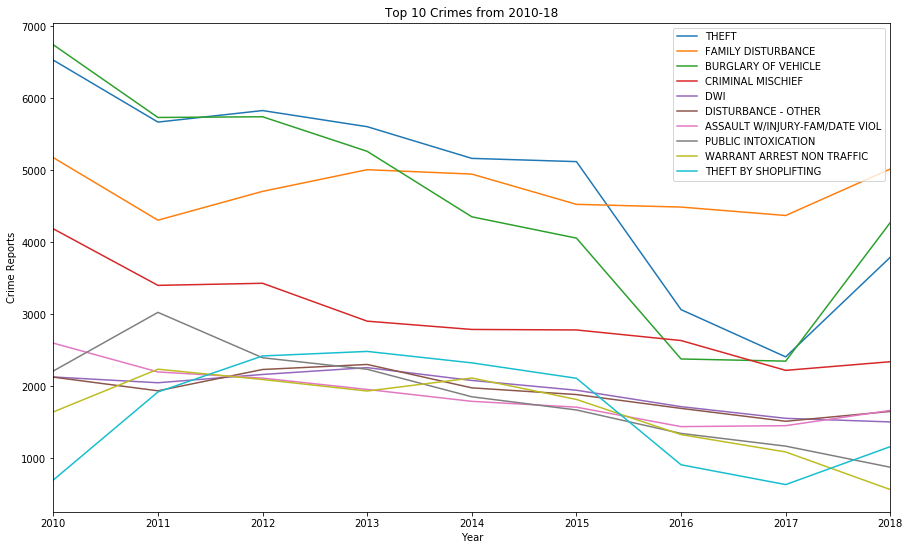

In [251]:
# Plot dataframe as line graph, offenses over years
offenses_plot = top10_offenses_df.plot.line(figsize=(15,9))
offenses_plot.set_ylabel("Crime Reports")
offenses_plot.set_title("Top 10 Crimes from 2010-18")

In [252]:
fig = offenses_plot.get_figure()
fig.savefig("top10offensesPerYear.png")

In [210]:
# calculate top crimes for zip code reports
top_zipcodes_10_18 = df['Zip Code'].value_counts().head(10).index.tolist()

In [212]:
df.head()

,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude
Datetime,,,,,,,,,,,,,,,,
2018-12-31 00:00:00,HARASSMENT,2703,N,2018-12-31,0,RESIDENCE / HOME,4600 MUELLER BLVD,78723.0,9.0,BA,3.06,N,1/9/19,NaN,30.299481,-97.708049
2018-12-31 17:30:00,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,2018-12-31,1730,RESIDENCE / HOME,11109 RENEL DR,78758.0,4.0,ED,18.45,N,1/8/19,NaN,30.383668,-97.695329
2018-12-31 07:55:00,DISTURBANCE - OTHER,3401,N,2018-12-31,755,STREETS / HWY / ROAD / ALLEY,715 E 8TH ST,78701.0,9.0,GE,11.00,N,1/6/19,NaN,30.267553,-97.734674
2018-12-31 11:04:00,THEFT,600,N,2018-12-31,1104,SPECIALTY STORE (TV FUR ETC.),9629 RESEARCH BLVD NB,78759.0,7.0,AD,17.53,N,1/9/19,Theft,30.389161,-97.743414
2018-12-31 19:30:00,HARASSMENT,2703,Y,2018-12-31,1930,RESIDENCE / HOME,13635 RUTLEDGE SPUR,78717.0,6.0,AD,203.11,N,1/8/19,NaN,30.476251,-97.780352


In [223]:
# List comprehension inside for loop, generates dict keyed w/ zip codes and lists of value over years
top_zipcodes_by_year = {}
for zipcode in top_zipcodes_10_18:
    top_zipcodes_by_year[int(zipcode)] = [ len(df[(df.index.year==year) & 
                                             (df["Zip Code"]==zipcode)] ) for year in years ]
    

In [224]:
# the dict created
top_zipcodes_by_year

{78701: [1316, 9133, 9151, 8898, 7999, 7711, 6151, 5185, 4321],
 78741: [7180, 5999, 5839, 5447, 4944, 4526, 3633, 3266, 3714],
 78753: [5789, 5225, 5585, 5415, 5194, 4787, 3244, 3167, 3600],
 78704: [3732, 5671, 5513, 5359, 4640, 4806, 3228, 2994, 3336],
 78758: [5161, 4156, 4048, 4062, 3831, 3812, 3022, 2933, 3551],
 78702: [3433, 4506, 4490, 4166, 3970, 3188, 2366, 2204, 2433],
 78745: [5559, 3282, 3207, 3193, 3035, 2893, 2540, 2472, 2911],
 78744: [5214, 2539, 2344, 2378, 2261, 2223, 2149, 1986, 2343],
 78723: [4355, 2527, 2376, 2424, 2172, 2049, 1988, 1838, 2321],
 78748: [1273, 2837, 2901, 2764, 2897, 2824, 1796, 1785, 2042]}

In [225]:
# convert dict to data frame
zip_df = pd.DataFrame(top_zipcodes_by_year)

In [226]:
# add years to df, set as index
zip_df["Year"] = years
zip_df = zip_df.set_index("Year")

In [228]:
zip_df.to_csv("../Resources/crime_by_zip_by_year.csv")

Text(0.5, 1.0, 'Top 10 Zip Codes for Crime Reports 2010-18')

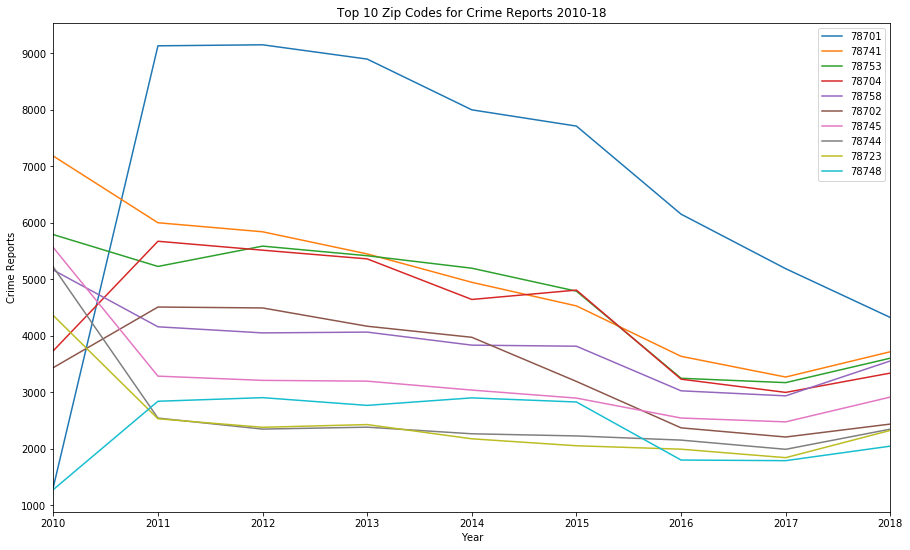

In [249]:
# plot zip code crime over the years
zip_plot = zip_df.plot.line(figsize=(15,9))
zip_plot.set_ylabel("Crime Reports")
zip_plot.set_title("Top 10 Zip Codes for Crime Reports 2010-18")

In [250]:
fig = zip_plot.get_figure()
fig.savefig("top10crimeZipsPerYear.png")

In [254]:
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [ ]:
top_10_location_types_10_18 = df['Location Type'].value_counts().head(10).index.tolist(

In [259]:
# Same as abve for location type
top_location_types_by_year = {}
for location in top_10_location_types_10_18:
    top_location_types_by_year[location] = [ len(df[(df.index.year==year) & (df["Location Type"]==location)] ) for year in years ]  

In [260]:
top_location_types_by_year

{'RESIDENCE / HOME': [31195,
  24044,
  22698,
  21758,
  20423,
  19860,
  16165,
  14931,
  18233],
 'STREETS / HWY / ROAD / ALLEY': [15698,
  17430,
  17359,
  16340,
  14779,
  13782,
  11461,
  11033,
  9987],
 'PARKING LOTS / GARAGE': [8533,
  6842,
  6455,
  6227,
  5689,
  5688,
  4522,
  4214,
  5226],
 'COMMERCIAL / OFFICE BUILDING': [6348,
  5735,
  5981,
  5617,
  3543,
  1893,
  971,
  856,
  1041],
 'OTHER / UNKNOWN': [1211, 1130, 1302, 1486, 2310, 2930, 2770, 2639, 3175],
 'DEPARTMENT / DISCOUNT STORE': [994,
  1370,
  1372,
  1368,
  1614,
  1711,
  835,
  716,
  1074],
 'GROCERY / SUPERMARKET': [824, 1061, 1274, 1327, 1348, 1334, 616, 538, 830],
 'HOTEL / MOTEL / ETC.': [843, 958, 875, 1041, 1101, 1059, 921, 767, 947],
 'RESTAURANTS': [937, 894, 900, 912, 898, 876, 744, 783, 990],
 'BAR / NIGHT CLUB': [418, 1192, 1187, 1152, 961, 906, 693, 489, 633]}

In [258]:
top_10_location_types_10_18

['RESIDENCE / HOME',
 'STREETS / HWY / ROAD / ALLEY',
 'PARKING LOTS / GARAGE',
 'COMMERCIAL / OFFICE BUILDING',
 'OTHER / UNKNOWN',
 'DEPARTMENT / DISCOUNT STORE',
 'GROCERY / SUPERMARKET',
 'HOTEL / MOTEL / ETC.',
 'RESTAURANTS',
 'BAR / NIGHT CLUB']

In [264]:
# Create data frame w/ location type mapped to value of crime reports over the years
location_df = pd.DataFrame(top_location_types_by_year)

In [265]:
location_df

,RESIDENCE / HOME,STREETS / HWY / ROAD / ALLEY,PARKING LOTS / GARAGE,COMMERCIAL / OFFICE BUILDING,OTHER / UNKNOWN,DEPARTMENT / DISCOUNT STORE,GROCERY / SUPERMARKET,HOTEL / MOTEL / ETC.,RESTAURANTS,BAR / NIGHT CLUB
0,31195,15698,8533,6348,1211,994,824,843,937,418
1,24044,17430,6842,5735,1130,1370,1061,958,894,1192
2,22698,17359,6455,5981,1302,1372,1274,875,900,1187
3,21758,16340,6227,5617,1486,1368,1327,1041,912,1152
4,20423,14779,5689,3543,2310,1614,1348,1101,898,961
5,19860,13782,5688,1893,2930,1711,1334,1059,876,906
6,16165,11461,4522,971,2770,835,616,921,744,693
7,14931,11033,4214,856,2639,716,538,767,783,489
8,18233,9987,5226,1041,3175,1074,830,947,990,633


In [266]:
location_df["Years"] = years

In [267]:
# add years and use as index
location_df = location_df.set_index("Years")

In [268]:
location_df

,RESIDENCE / HOME,STREETS / HWY / ROAD / ALLEY,PARKING LOTS / GARAGE,COMMERCIAL / OFFICE BUILDING,OTHER / UNKNOWN,DEPARTMENT / DISCOUNT STORE,GROCERY / SUPERMARKET,HOTEL / MOTEL / ETC.,RESTAURANTS,BAR / NIGHT CLUB
Years,,,,,,,,,,
2010,31195,15698,8533,6348,1211,994,824,843,937,418
2011,24044,17430,6842,5735,1130,1370,1061,958,894,1192
2012,22698,17359,6455,5981,1302,1372,1274,875,900,1187
2013,21758,16340,6227,5617,1486,1368,1327,1041,912,1152
2014,20423,14779,5689,3543,2310,1614,1348,1101,898,961
2015,19860,13782,5688,1893,2930,1711,1334,1059,876,906
2016,16165,11461,4522,971,2770,835,616,921,744,693
2017,14931,11033,4214,856,2639,716,538,767,783,489
2018,18233,9987,5226,1041,3175,1074,830,947,990,633


Text(0.5, 1.0, 'Top 10 Locations for Crime Reports 2010-18')

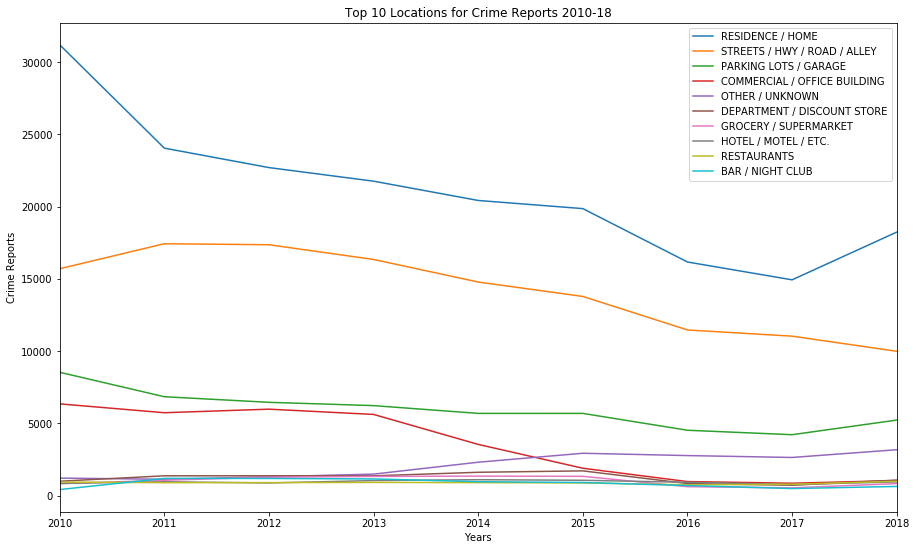

In [269]:
# Graphy location type over the years
loc_plot = location_df.plot.line(figsize=(15,9))
loc_plot.set_ylabel("Crime Reports")
loc_plot.set_title("Top 10 Locations for Crime Reports 2010-18")

In [271]:
fig = loc_plot.get_figure()
fig.savefig("top10locationTypesPerYear.png")